In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Import

In [2]:
df=pd.read_csv("diamonds.csv", error_bad_lines=False)
df.drop(columns=['Unnamed: 0'], inplace=True)

/var/folders/sc/m38hzk_90cn6t0363cr74ny40000gn/T/ipykernel_70914/2632707547.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("diamonds.csv", error_bad_lines=False)


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


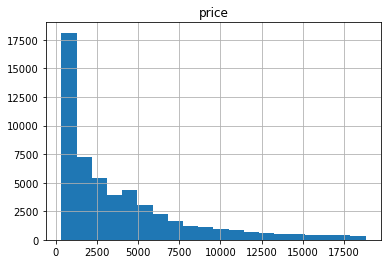

In [5]:
df.hist(column='price', bins=20)
plt.show()

In [6]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [8]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Data Preprocessing

In [73]:
df2 = pd.get_dummies(df,columns=['cut', 'color', 'clarity'], drop_first=True)
df2.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)
df3 = pd.DataFrame(df_scaled, index=df2.index, columns=df2.columns)
df3.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129,-0.316312,1.225928,-0.586085,...,-0.42657,-0.334294,-0.234343,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175,-0.316312,-0.815708,1.706238,...,-0.42657,-0.334294,-0.234343,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175,3.161440,-0.815708,-0.586085,...,-0.42657,-0.334294,-0.234343,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720,-0.316312,-0.815708,1.706238,...,-0.42657,2.991381,-0.234343,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674,3.161440,-0.815708,-0.586085,...,-0.42657,-0.334294,4.267248,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


# Feature Importance

In [75]:
X = df3.drop(columns=['price'])
y = df3['price']

In [76]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [77]:
estimator = RandomForestRegressor()
selector = RFE(estimator, verbose=True, n_features_to_select=5)
selector = selector.fit(X, y)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [78]:
X_selected = X[selector.get_feature_names_out()]
X_selected.head()

,carat,depth,x,y,clarity_SI2
0,-1.198168,-0.174092,-1.587837,-1.536196,2.206098
1,-1.240361,-1.360738,-1.641325,-1.658774,-0.453289
2,-1.198168,-3.385019,-1.498691,-1.457395,-0.453289
3,-1.071587,0.454133,-1.364971,-1.317305,-0.453289
4,-1.029394,1.082358,-1.240167,-1.212238,2.206098


In [79]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_selected, y)

RandomForestRegressor(random_state=0)

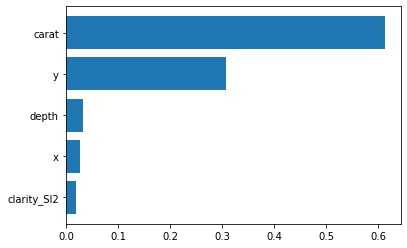

In [80]:
df_feature = pd.DataFrame(zip(selector.get_feature_names_out(),forest.feature_importances_), columns=['Feature', 'Importance']).sort_values('Importance')

plt.barh(df_feature.Feature, df_feature.Importance)
plt.show()

In [81]:
features = df_feature[df_feature['Importance']>0.01]['Feature'].tolist()

In [82]:
X_features = X[features]

# Modeling

In [83]:
from xgboost import XGBRegressor

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.25, random_state=42)

In [85]:
model = XGBRegressor(eval_metric='mae')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [86]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

0.09894408710263534
0.3145537904757076


In [88]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.1714002555928617
